# Team 5
## Discovery phase 1:
### Business Scenario

Objective:

To predict the price range of mobile phones from their specifications early in the design process, enabling manufacturers to tailor features for specific market segments. 



Problem:

A variety of factors including battery capacity, camera specifications, and processing power significantly impact the pricing and market positioning of mobile phones. Mispriced models can lead to market mismatches, resulting in unsold inventory and missed opportunities in specific consumer segments. By employing machine learning to accurately classify mobile phones into appropriate price ranges early in their design, manufacturers can better tailor their products to meet consumer demands and optimize market strategies, thus enhancing overall market success and consumer satisfaction.



In [12]:
# this is a github test
import pandas as pd
df = pd.read_csv('mobile_price_classification2.csv')
display(df)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,No,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,No,Yes,Cheap
1,1021,1,0.5,Yes,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,Yes,No,Avarage
2,563,1,0.5,Yes,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,Yes,No,Avarage
3,615,1,2.5,No,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,No,No,Avarage
4,1821,1,1.2,No,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,Yes,No,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,Yes,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,Yes,No,Very Cheap
1996,1965,1,2.6,Yes,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,Yes,Yes,Avarage
1997,1911,0,0.9,Yes,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,Yes,No,Expensive
1998,1512,0,0.9,No,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,Yes,Yes,Very Cheap


In [13]:
#1. Reading & displaying the data 
import pandas as pd
df = pd.read_csv('mobile_price_classification2.csv')
display(df.head())
#display(df)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,No,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,No,Yes,Cheap
1,1021,1,0.5,Yes,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,Yes,No,Avarage
2,563,1,0.5,Yes,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,Yes,No,Avarage
3,615,1,2.5,No,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,No,No,Avarage
4,1821,1,1.2,No,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,Yes,No,Cheap


In [14]:
#listing the fields and variables and identifying their type:
variables = df.columns.tolist()
#by reading the selected data, we identified the field types:
fieldTypes = ['numeric', 'nominal', 'numeric', 'nominal', 'numeric', 'nominal', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'numeric', 'nominal', 'nominal', 'nominal', 'categorical']

zippedData = zip(variables, fieldTypes)
print("Field Name      |   Field Type")
print("________________________________")

for fieldName, fieldType in zippedData:
    print(f"{fieldName.ljust(15)} | {fieldType}")   
#.ljust(12) is used to left-align the field names and pad them with spaces up to a width of 12 characters  

Field Name      |   Field Type
________________________________
battery_power   | numeric
blue            | nominal
clock_speed     | numeric
dual_sim        | nominal
fc              | numeric
four_g          | nominal
int_memory      | numeric
m_dep           | numeric
mobile_wt       | numeric
n_cores         | numeric
pc              | numeric
px_height       | numeric
px_width        | numeric
ram             | numeric
sc_h            | numeric
sc_w            | numeric
talk_time       | numeric
three_g         | nominal
touch_screen    | nominal
wifi            | nominal
price_range     | categorical


In [15]:
##this code has wrong results. Due to that we need to observe the data ourselves
#listing the fields and variables and identifying their type:
#variables = df.columns.tolist()

#field_types = df.dtypes    
#fieldTypes = []   # a list to store the field types

#for column, dtype in field_types.items():
    # Check if the column is of object type (categorical or nominal)
#    if dtype == 'object':
#        unique_count = df[column].unique()
#        if unique_count <= 10:
#            fieldTypes.append('categorical')
#        else:
#            field_type_list.append('nominal')
#    # Check if the column is of numeric type (numerical)
#    elif pd.api.types.is_numeric_dtype(dtype):
#       fieldTypes.append('numeric')
#    else:
#        fieldTypes.append('other')

In [16]:
# identifying data type, we can also find the inconsistencies by looking at the data type column
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

None

In [18]:
# datatypes in python
display(df.info())

# resolving inconsistency
#df["Population"]=df["Population"].apply(lambda x: int(x.replace(",","")))
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

None

In [23]:
#part 3 (i), Find the statistical summaries:
numarical = df.select_dtypes(include='number')
categorical = df.select_dtypes(exclude='number')
display(numarical.describe())
display(categorical.describe())

,battery_power,blue,clock_speed,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1237.861500,0.4950,1.522250,4.309500,0.521500,32.046500,0.504000,140.156000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500
std,441.266536,0.5001,0.816004,4.341444,0.499662,18.145715,0.305452,35.766273,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273
min,-657.000000,0.0000,0.500000,0.000000,0.000000,2.000000,0.100000,-93.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.0000,0.700000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000
50%,1226.000000,0.0000,1.500000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000
75%,1615.250000,1.0000,2.200000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000
max,1998.000000,1.0000,3.000000,19.000000,1.000000,64.000000,5.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000


,dual_sim,touch_screen,wifi,price_range
count,2000,1999,2000,2000
unique,2,2,2,4
top,Yes,Yes,Yes,Cheap
freq,1019,1005,1014,500


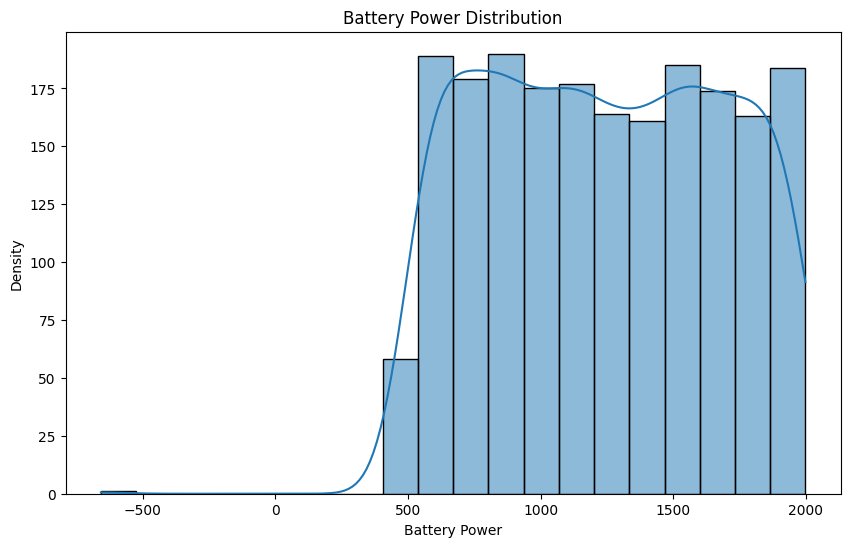

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# 2. Make univariate graphs (graphs based on single variable)
# Example: Histogram for a single variable using distplot
plt.figure(figsize=(10, 6))
sns.histplot(df['battery_power'], bins=20, kde=True)
plt.title("Battery Power Distribution")
plt.xlabel("Battery Power")
plt.ylabel("Density")
plt.show()

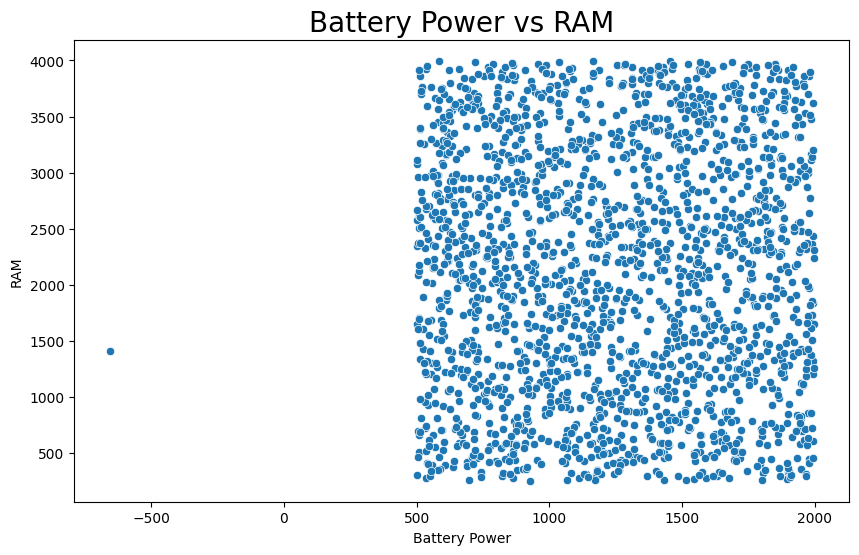

In [21]:
# 3. Prepare bivariate plots (plots based on two variables)
# Example: Scatter plot for two variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x = df['battery_power'], y = df['ram'])
plt.title("Battery Power vs RAM", fontsize = 20)
plt.xlabel("Battery Power")
plt.ylabel("RAM")
plt.show()

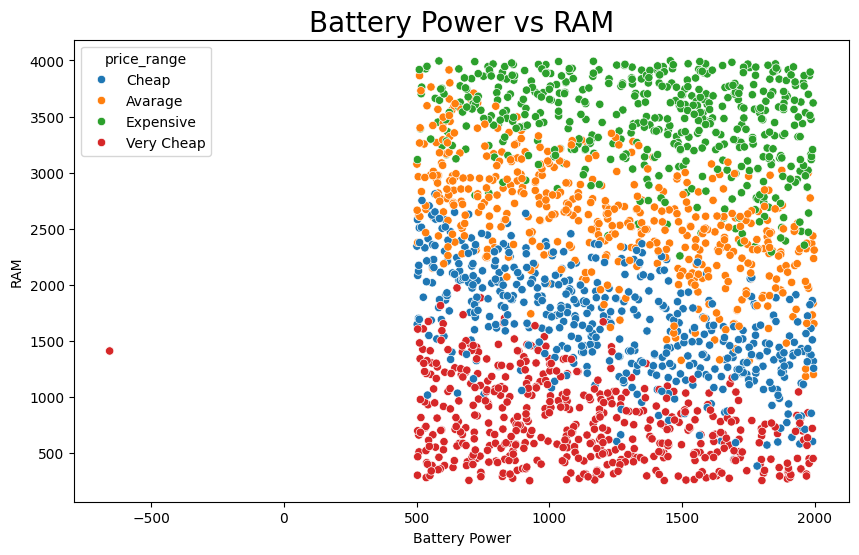

In [22]:
# 3. Prepare bivariate plots (plots based on three variables)
# Example: Scatter plot for three variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x = df['battery_power'], y = df['ram'], hue = df['price_range'])
plt.title("Battery Power vs RAM", fontsize = 20)
plt.xlabel("Battery Power")
plt.ylabel("RAM")
plt.show()